=== Equipment Failure Log ===
        Date Equipment  Failure Type            Root Cause
0 2024-01-10    Pump A          Leak             Worn Seal
1 2024-02-15   Motor B   Overheating  Insufficient Cooling
2 2024-03-05    Pump A  Seal Failure         Seal Material
3 2024-03-22   Motor B     Vibration      Unbalanced Rotor

=== Failures by Equipment ===
Equipment
Pump A     2
Motor B    2
Name: count, dtype: int64


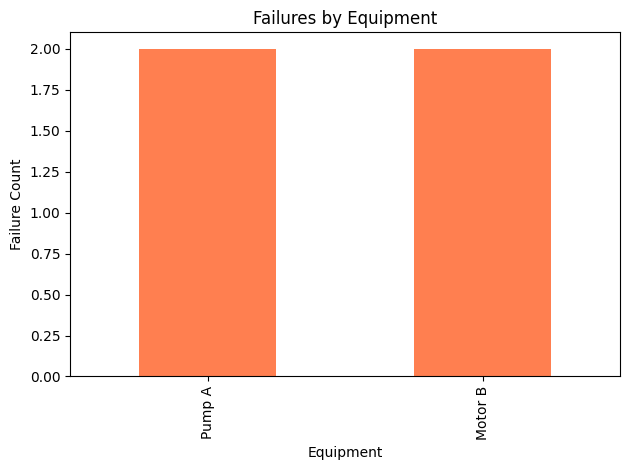


=== Failures by Type ===
Failure Type
Leak            1
Overheating     1
Seal Failure    1
Vibration       1
Name: count, dtype: int64


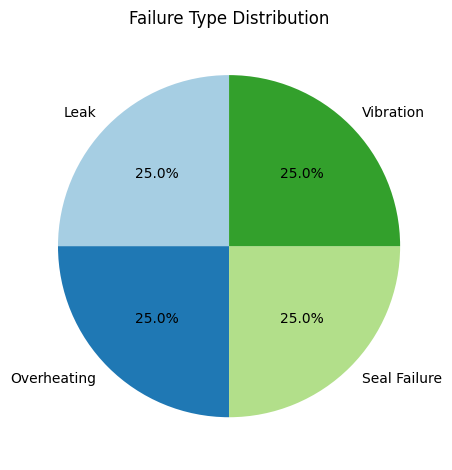


=== Failures Over Time ===
Date
2024-01-10    1
2024-02-15    1
2024-03-05    1
2024-03-22    1
dtype: int64


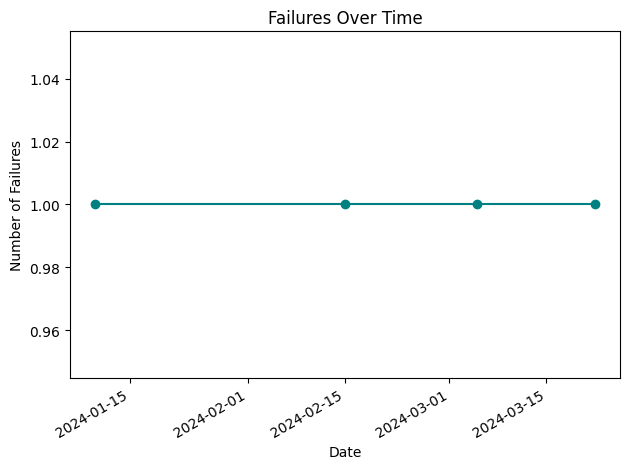


=== 5 Whys Analysis (Example: Pump A Seal Failure) ===
1. Why did the pump leak? -> Because the seal failed.
2. Why did the seal fail? -> Because it was made of incorrect material.
3. Why was incorrect material used? -> Because procurement chose the cheaper option.
4. Why was cost prioritized over specs? -> Due to lack of technical review.
5. Why was there no review? -> Because the standard operating procedure was not followed.

=== Fishbone Diagram (Text Format) ===
Man: Operator not trained on new seal material
Machine: Old pump design incompatible with current seals
Method: No standard inspection procedure for seals
Material: Inferior quality seals procured
Measurement: No failure threshold alerts
Environment: High ambient temperature accelerated wear


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample equipment failure log
data = {
    'Date': ['2024-01-10', '2024-02-15', '2024-03-05', '2024-03-22'],
    'Equipment': ['Pump A', 'Motor B', 'Pump A', 'Motor B'],
    'Failure Type': ['Leak', 'Overheating', 'Seal Failure', 'Vibration'],
    'Root Cause': ['Worn Seal', 'Insufficient Cooling', 'Seal Material', 'Unbalanced Rotor']
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date column is in datetime format

# === Equipment Failure Log ===
print("=== Equipment Failure Log ===")
print(df)

# === Graph 1: Failures by Equipment ===
failure_by_equipment = df['Equipment'].value_counts()
print("\n=== Failures by Equipment ===")
print(failure_by_equipment)

plt.figure()
failure_by_equipment.plot(kind='bar', color='coral')
plt.title('Failures by Equipment')
plt.xlabel('Equipment')
plt.ylabel('Failure Count')
plt.tight_layout()
plt.show()

# === Graph 2: Failure Type Distribution ===
failure_by_type = df['Failure Type'].value_counts()
print("\n=== Failures by Type ===")
print(failure_by_type)

plt.figure()
failure_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Failure Type Distribution')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

# === Graph 3: Failures Over Time ===
failures_by_date = df.groupby('Date').size()
print("\n=== Failures Over Time ===")
print(failures_by_date)

plt.figure()
failures_by_date.plot(kind='line', marker='o', color='teal')
plt.title('Failures Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Failures')
plt.tight_layout()
plt.show()

# === 5 Whys Analysis ===
print("\n=== 5 Whys Analysis (Example: Pump A Seal Failure) ===")
whys = [
    "1. Why did the pump leak? -> Because the seal failed.",
    "2. Why did the seal fail? -> Because it was made of incorrect material.",
    "3. Why was incorrect material used? -> Because procurement chose the cheaper option.",
    "4. Why was cost prioritized over specs? -> Due to lack of technical review.",
    "5. Why was there no review? -> Because the standard operating procedure was not followed."
]
for why in whys:
    print(why)

# === Fishbone Diagram (Text Representation) ===
print("\n=== Fishbone Diagram (Text Format) ===")
fishbone = {
    "Man": "Operator not trained on new seal material",
    "Machine": "Old pump design incompatible with current seals",
    "Method": "No standard inspection procedure for seals",
    "Material": "Inferior quality seals procured",
    "Measurement": "No failure threshold alerts",
    "Environment": "High ambient temperature accelerated wear"
}
for category, cause in fishbone.items():
    print(f"{category}: {cause}")
